***
*Project:* Helmholtz Machine on Niche Construction

*Author:* Jingwei Liu, Computer Music Ph.D., UC San Diego
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Experiment 3_1</span> 

# Real-Time Synthesis


*Created:* December 21, 2023

*Updated:* December 22, 2023

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import pyaudio
import wave
import sys
import os
from pathlib import Path

In [19]:
y, fs = librosa.load('Instruments/kick.wav',sr=None)

In [20]:
fs

96000

In [45]:
len(y)

64753

In [8]:
Audio(data=y, rate=fs)

In [50]:
gen = np.zeros(1000000,)

In [51]:
gen[:len(y)] = y

In [52]:
gen.size

1000000

In [53]:
Audio(data=gen, rate=fs)

In [18]:
y.min()

-0.60976094

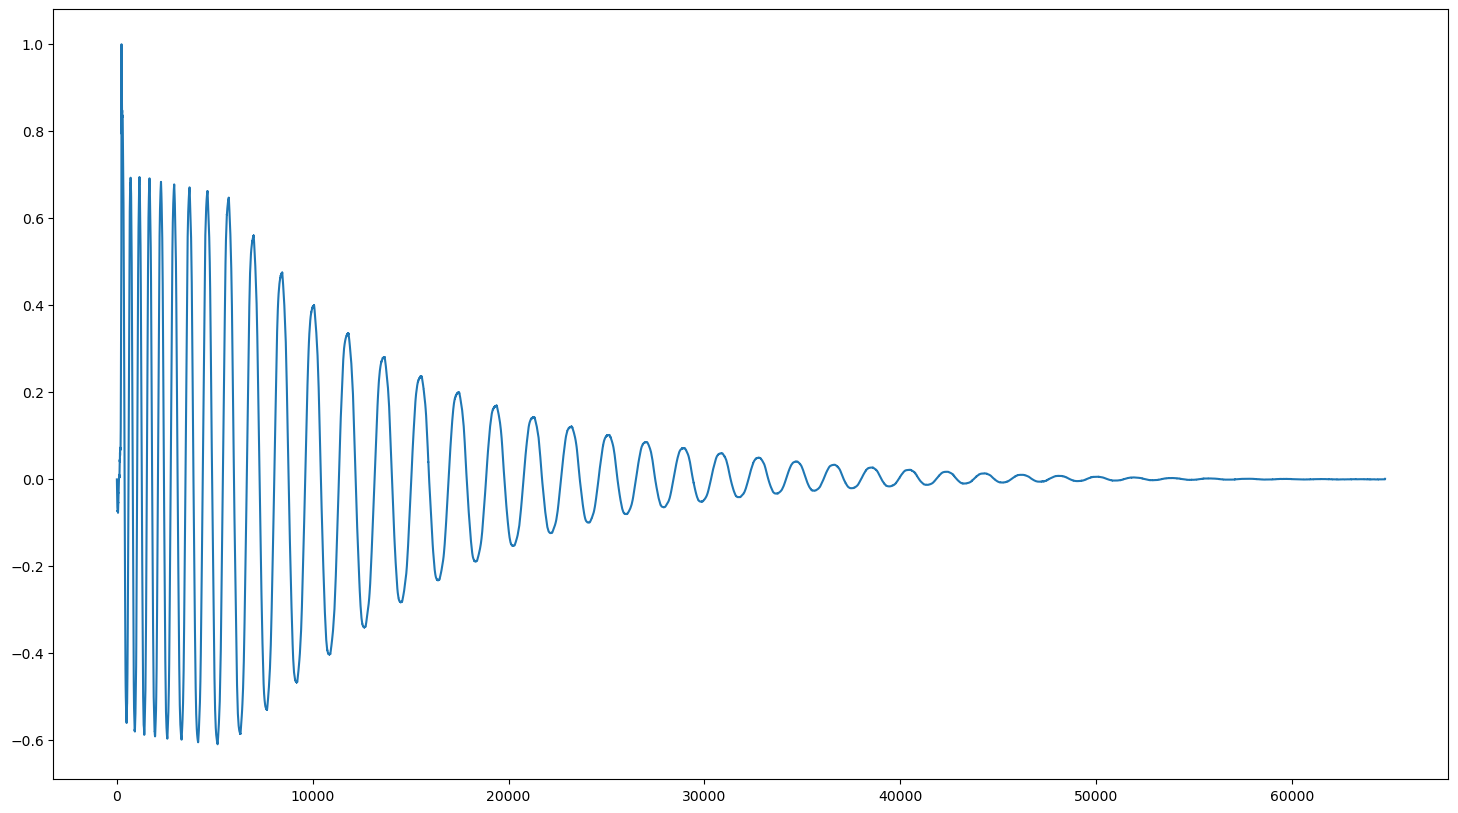

In [23]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.plot(y)
plt.show()

Int16 -- (-32,768 to +32,767)

Int32 -- (-2,147,483,648 to +2,147,483,647)

In [54]:
yy = (gen * 32768+0.5).astype('int16')
yy

array([ -24, -132, -204, ...,    0,    0,    0], dtype=int16)

In [55]:
bytestream = yy.tobytes()
pya = pyaudio.PyAudio()
stream = pya.open(format=pya.get_format_from_width(width=2), channels=1, rate=fs, output=True)
stream.write(bytestream)
stream.stop_stream()
stream.close()

pya.terminate()

In [56]:
pya = pyaudio.PyAudio()
stream = pya.open(format=pya.get_format_from_width(width=2), channels=1, rate=fs, output=True)

for i in range(5):
    bytestream = yy.tobytes()
    stream.write(bytestream)
    
stream.stop_stream()    
stream.close()
pya.terminate()

In [57]:
def random_generate(k,n,n_data,value_set):
    """
    The dataset is generated in a favor of Bayesian mixure of Gaussians. Given k mixture Gaussian components, we sample their 
    means u_1...u_k uniformly from [0,1]. Then we randomly assign each neuron to one of the components, and sample from its 
    Gaussian distribution (u_k, sigma). sigma is a hyperparameter, we default it to 1.
    
    The "Bayesian mixure of Gaussians" generation is just a way to generate dataset with non-singular distributions. The 
    generated data distribution is not identified with the mixure of Gaussian distributions that generated it. In other words, 
    the data is treated as sole evidence without any prior on how it's been generated thus its reconstruction is not convolved 
    with it's generative distributions, which is a major difference from varietional inference.
        
    Arguments:
    k -- number of Gaussian components
    n -- length of input layer (single data point)
    n_data -- number of datapoints to generate
    value_set -- list or array [a,b], where a is the positive outcome and b is the negative outcome of a Bernoulli experiment
    
    Returns:
    random_set -- generated dataset, numpy array of shape (n,n_data), n_data is the number of datapoints in the generated dataset
    """
    
    u = np.random.rand(k,)
    c = np.random.randint(k, size=(n,1))
    mean = u[c]
    prob = np.random.randn(n,n_data) + mean
    random_set = (prob>0.5).astype(int)
    
    a = value_set[0]
    b = value_set[1]
    random_set = random_set *(a-b)+b
    
    return random_set

In [132]:
n = 12
n_data = 10
random_set = random_generate(6,n,n_data,[1,0])
random_set

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

In [69]:
txt_folder = Path('Instruments').rglob('*.wav')
Instruments = []
for x in txt_folder:
    basename = os.path.basename(x)
    filename = os.path.splitext(basename)[0]
    Instruments.append(filename)

In [70]:
Instruments

['clap', 'hihat closed', 'hihat open', 'kick', 'ride', 'snare', 'Tom', 'wood']

In [71]:
# group instruments
Instruments = [['kick','Tom'],['snare','hihat open'],['hihat closed','clap'],['ride','wood']]
Instruments

[['kick', 'Tom'],
 ['snare', 'hihat open'],
 ['hihat closed', 'clap'],
 ['ride', 'wood']]

In [79]:
p = [0.4, 0.3, 0.2, 0.1]

In [89]:
choice = np.random.choice(4, 3, replace=False, p = [0.4, 0.3, 0.2, 0.1])
choice

array([2, 3, 0])

In [90]:
choice.shape

(3,)

In [93]:
Instruments[choice[0]][np.random.randint(2)]

['hihat closed', 'clap']

In [103]:
np.random.randint(2,size = 4)

array([1, 0, 1, 1])

In [108]:
np.mod(np.random.randint(2,size = 4),2)

array([0, 0, 1, 0], dtype=int32)

In [95]:
n = 12
division = 4

In [124]:
choice1_group = np.random.choice(4, 4, replace=False, p = [0.4, 0.3, 0.2, 0.1])
choice_index = np.random.randint(2,size = 4)
choice1_inst = choice_index[choice1_group]
choice2_group = np.random.choice(4, 4, replace=False)
choice2_inst = np.mod(choice_index+1,2)[choice2_group]
choice = np.array([np.append(choice1_group,choice2_group),np.append(choice1_inst,choice2_inst)])
choice

array([[0, 2, 1, 3, 1, 0, 2, 3],
       [0, 0, 0, 1, 1, 1, 1, 0]])

In [128]:
Instruments[choice[0,0]][choice[1,0]]

'kick'

In [120]:
k = int(n/division+0.5)
k

3

In [129]:
instr_choice = ['']*k
for i in range(k):
    instr_choice[i] = Instruments[choice[0,i]][choice[1,i]]
instr_choice

['kick', 'hihat closed', 'snare']

In [130]:
random_set

array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1]])

In [147]:
kick, fs = librosa.load('Instruments/ride.wav')
fs

22050

In [150]:
len(kick)/fs

2.492471655328798

In [149]:
for i in range(n_data):
    for j in range(k-1):
        notes = random_set[j*division:(j+1)*division,i]
        instrument = instr_choice[j]
    j = j+1
    notes = random_set[j*division:,i]
    instrument = instr_choice[j]

In [ ]:
BPM = 80